# ENGS93: Statistical Methods in Engineering:
## <span class="mark">HOMEWORK 3 <span class="mark">SOLUTIONS</span></span>

## QUESTION 1

Load code from RX1 and create the necessary variables:

In [1]:
#RX 1 Full Code solutions
#RUN THIS CELL
opihi <- read.delim("https://raw.githubusercontent.com/sarahkorb/difuse_test/main/Opihi_rx1.txt", header = TRUE, sep = "\t", dec = ".")
summary(opihi)
attach(opihi)

#The following variables will be necessary for the HW portion of this Notebook. 
#If you would like to adjust them to your liking (perhaps to match your own from the RX1_A, do so here.
xbar.v=mean(Velocity)
xbar.d=mean(Depth)
s.v=sd(Velocity)
s.d=sd(Depth)

x.v=seq(from=0, to=4, by=0.01)
y.v=dnorm(x.v, mean=xbar.v, sd=s.v)

x.d=seq(from=0, to=0.8, by=0.01)
y.d=dnorm(x.d, mean=xbar.d, sd=s.d)

     Name               Depth           Velocity     
 Length:275         Min.   :0.0300   Min.   :0.2249  
 Class :character   1st Qu.:0.2550   1st Qu.:1.1493  
 Mode  :character   Median :0.3700   Median :1.6320  
                    Mean   :0.3586   Mean   :1.5893  
                    3rd Qu.:0.4500   3rd Qu.:2.0089  
                    Max.   :0.7200   Max.   :3.3914  

### a)

In [2]:
low.v = pnorm(1.5, mean=xbar.v, sd=s.v)
high.d = pnorm(0.4, mean=xbar.d, sd=s.d, lower.tail=FALSE) 
#Can alternatively use the formula: 1-high.d = pnorm(0.4, mean=xbar.d, sd=s.d)
#low.v=0.4389578, high.d=0.3843959

### b)

In [3]:
sum(Velocity<1.5)/length(Velocity) #=0.4109091
sum(Depth>0.4)/length(Depth) #=0.3854545
low.v*high.d #=0.1687336
sum(Velocity<1.5 & Depth>0.4)/length(Depth) #=0.06545455

[1] 0.4109091

[1] 0.3854545

[1] 0.1687336

[1] 0.06545455

Velocity empirical probability: This is very similar to low.v because of the closeness of the Velocity distribution to a normal distribution

Depth empirical probability:This is very similar to high.d because of the closeness of the Depth distribution to a normal distribution

Joint Probability: These two values are very different from each other because Velocity andDepth are clearly not independent variables.

### c)

[1] 0.6032571

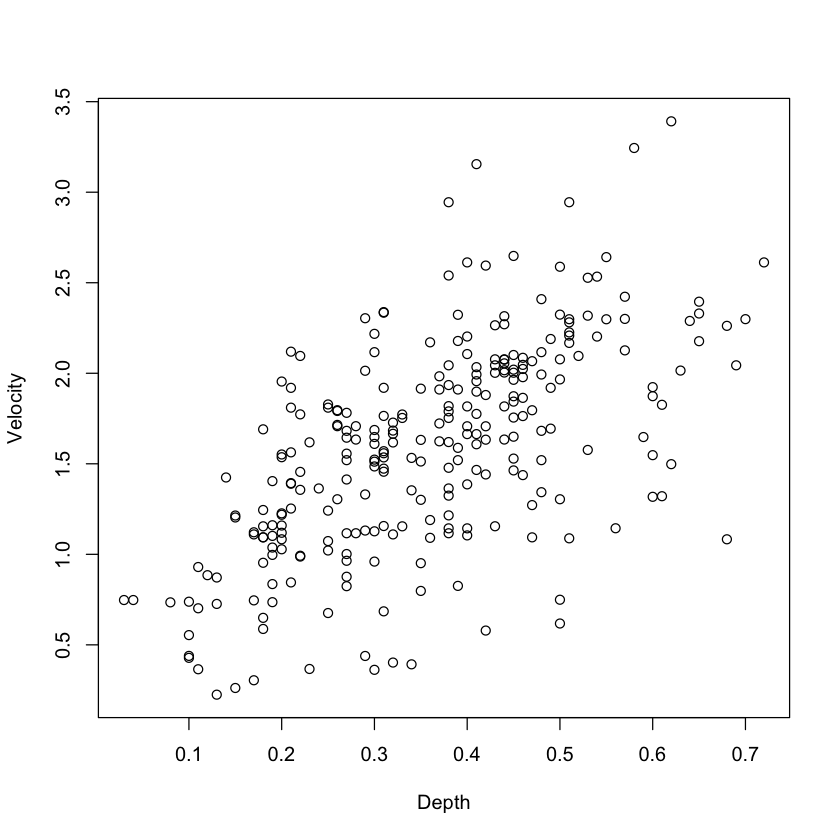

In [4]:
plot(Velocity~Depth)
cov.vd=cov(Velocity, Depth) #=0.04936435
cor.vd=cov.vd/(s.v*s.d) #=0.6032571
cor(Velocity, Depth) #=0.6032571

Looking at the data I see that Velocity and Depth are positively correlated.
When one increases, the other increases too.
This value of correlation coefficient is consistent with the scatterplot.

### d)


The downloaded binary packages are in
	/var/folders/bp/wb_31tc90zq7dm9g3_4gvls00000gn/T//RtmpJYvRCA/downloaded_packages


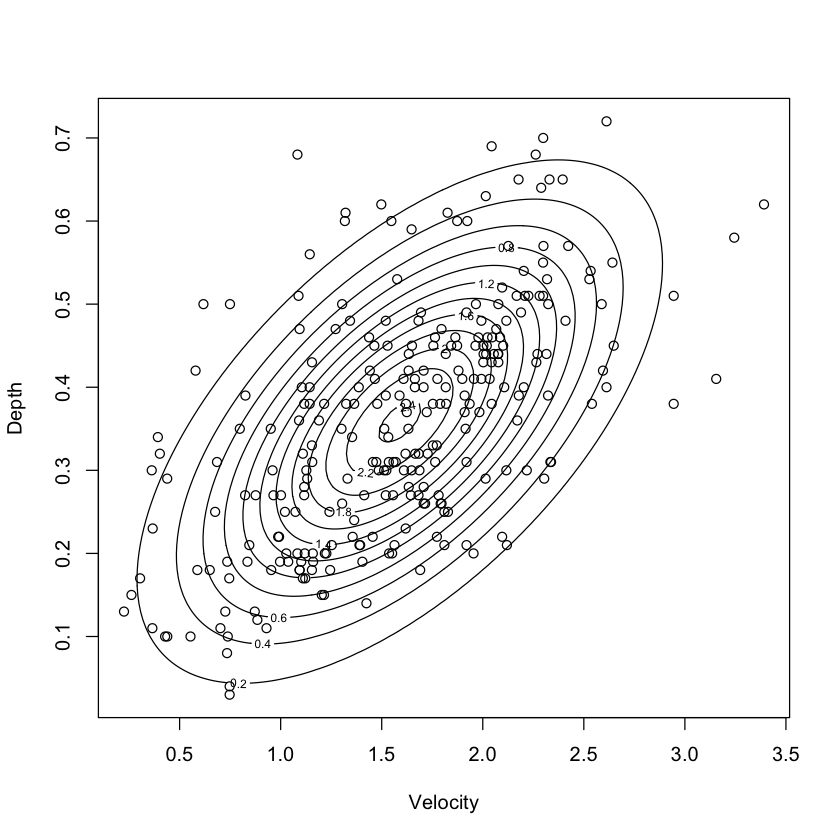

In [5]:
#Might take a second or two to run, be patient! 
install.packages("mvtnorm")
library(mvtnorm)
m=c(xbar.v,xbar.d)
cov.mat=matrix(c(var(Velocity), cov.vd, cov.vd, var(Depth)), ncol=2)
z=matrix(NA, nrow=length(x.v), ncol=length(x.d))
for (i in 1:length(x.v)) {
 for (j in 1:length(x.d)) {
 z[i,j]=dmvnorm(c(x.v[i],x.d[j]), mean=m, sigma=cov.mat)
 }
}
plot(Depth~Velocity)
contour(x=x.v, y=x.d, z=z, nlevels=10, add=T)

### e)

In [6]:
pmvnorm(lower=c(-Inf,0.4), upper=c(1.5,Inf), mean=m, sigma=cov.mat)

[1] 0.07375687
attr(,"error")
[1] 1e-15
attr(,"msg")
[1] "Normal Completion"

This equals 0.07375687, which is a lot closer to the data based estimate of 0.06545455
than does the one obtained using independence assumption (0.1687336)
It is closer because this new number calculation does not assume independence but rather only assumes normality
The difference between 0.07375687 and 0.06545455 is due to the extent to which the data is different than the bivariate normal distribution.